# Pendule

On considère un pendule de masse $m$, longueur $l$ qui oscille dans le champ de gravité $g$ entre $\pm \theta_0$. 

Pour les applications numériques, on prendre $m=100~\mathrm{g}$, $l = 1~\mathrm{m}$ et $g = 9.806~\mathrm{m/s^2}$


## Formule de Borda

1. Dans la limite des petites oscillations, la periode du pendule est donnée par $T_0 = 2\pi\sqrt{\frac lg}$. Calculez numériquement $T_0$

La formule de Borda nous dit que, à l'ordre 2 : 

$$ \frac T{T_0} = 1 + \frac{\theta^2}{16}$$

2. Tracez la formule de Borda pour $\theta_0$ entre $0$ et $\pi/2$


## Calcul numérique


1. Dans le cas général, on peut démontrer que la période du pendule est donnée par:

    $$ \frac T{T_0} = \frac 2\pi \int_0^{\pi/2} \frac{d\phi}{\sqrt{1-k^2\sin^2\phi}} $$

    où $k=\sin\frac{\theta_0}2$.
    Calculez $T$ pour $\theta_0 = \frac\pi4$. On utilisera la fonction ``quad`` du package scipy.integrate
    
2. Tracez avec des points la valeurs de $T(\theta)/T_0$ pour une dizaine de points entre $0$ et $\pi/2$. 

3. Tracez la formule de Borda sur le même graphe pour comparer. Tracez l'erreur relative en fonction de $\theta_0$. 

4. Vérifiez numériquement le coefficient $\frac 1{16}$ de la formule de Borda.

## Analyse de données

Vous venez de faires des mesures de la période du pendule pour différents angles. Pour cela, vous avez mesuré à l'aide d'un chronomètre la durée totale de N oscillations. Voici les résultats des mesures:

|θ(°) | N | T(s)|
|---|---|---|
| 10 | 20 | 37.70 |
| 20 | 15 | 28.28 |
| 30 | 15 | 28.46 |
| 40 | 20 | 38.71 |
| 50 | 25 | 49.50 |
| 15 | 20 | 37.64 |


1. Rentrez ces données dans un tableur (e.g. libre office), sauvegardez les dans un fichier csv et impotez les données avec Python.

2. Tracez la periode en fonction de $\theta_0$

3. On estime que l'intertitude de l'expérimentateur dans la mesure de T est de 200 ms. Tracez les points avec des barres d'erreurs

4. Ajustez les données par la fonction $T(\theta) = T_0(1 + \beta\theta^2)$. 
    * Tracez les données avec l'ajustement,
    * Quelle est la longueur du pendule,
    * Son incertitude ? 


In [1]:
# On commence par tous les import 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [2]:
# On commence par écrire toutes les constantes. Par défaut, on utilise les unités SI
m = 0.1
l = 0.7
g = 9.806

In [3]:
T_0 = 2*np.pi*np.sqrt(l/g)
print(T_0)
# Pour afficher juste 3 chiffres
print('T_0 = {:.3f} s'.format(T_0))

1.678738087582152
T_0 = 1.679 s


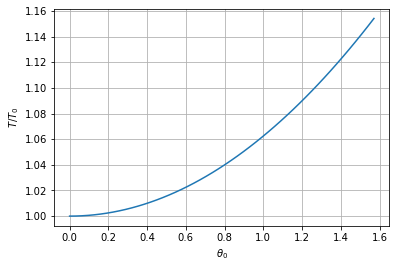

In [4]:
def borda(theta_0):
    return 1 + theta_0**2/16

theta_plot = np.linspace(0, np.pi/2)

plt.plot(theta_plot, borda(theta_plot))
plt.grid()
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$T/T_0$');

In [5]:
def integrande(phi, theta_0):
    k = np.sin(theta_0/2)
    return 1/(np.sqrt(1-k**2*np.sin(phi)**2))

# Il faut lire la documentation ou prendre un exemple sur internet !
integral, err = quad(integrande, 0, np.pi/2, args=(np.pi/4,))

T_pi_sur_4 = T_0*2/np.pi*integral
print('Pour pi/4 : T = {:.3f} s'.format(T_pi_sur_4))

Pour pi/4 : T = 1.746 s


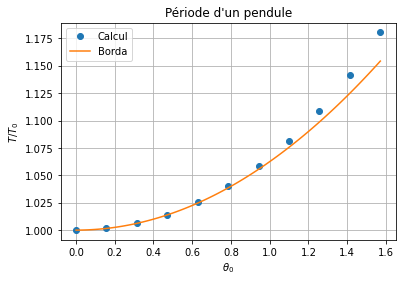

In [6]:
# Une bonne habitude: des noms explicites
def periode_pendule(theta_0):
    integral, err = quad(integrande, 0, np.pi/2, args=(theta_0,))
    return 2/np.pi*integral


theta_0_pts = np.linspace(0, np.pi/2, 11)
periode = [periode_pendule(theta_0) 
                      for theta_0 in theta_0_pts]

plt.plot(theta_0_pts, periode, 'o', 
     label='Calcul')

theta_0_curve = np.linspace(0, np.pi/2, 101)
plt.plot(theta_0_curve, borda(theta_0_curve), label='Borda')
plt.title(r"Période d'un pendule")
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$T/T_0$')
plt.grid(True)
plt.legend();

In [7]:
theta_0 = 1E-2
print(f'Ecart à la formule de Borda pour theta_0={theta_0:.2f} :', (periode_pendule(theta_0)-1)/theta_0**2 - 1/16)

Ecart à la formule de Borda pour theta_0=0.01 : 3.580756455789924e-07


In [8]:
theta_in_deg, N, Ttot = np.loadtxt('pendule-periodes.csv', unpack=True)
# Si le fichier contient des ',' comme séparateur décimal
#from pandas import read_csv
#theta_in_deg, N, Ttot = read_csv('pendule-periodes.csv', delimiter=' ', 
#             decimal='.', header=None).to_numpy().transpose()


theta_in_rad = theta_in_deg/180 * np.pi
T = Ttot/N

In [4]:
from pandas import read_csv
df = read_csv('pendule-periodes.csv', delimiter=' ', decimal='.', header=None)
df

0   1      2
0  10  20  37.70
1  15  20  37.64
2  20  15  28.28
3  30  15  28.46
4  40  20  38.71
5  50  25  49.50

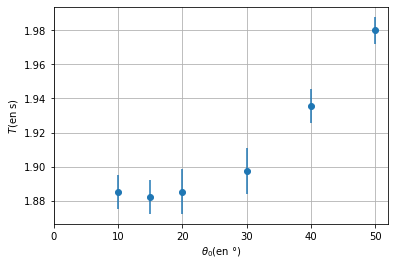

In [9]:
plt.errorbar(theta_in_deg, T, yerr=0.2/N, fmt='o')
plt.xlim(0, None)
plt.grid(True)
plt.xlabel(r'$\theta_0$(en °)')
plt.ylabel(r'$T$(en s)');

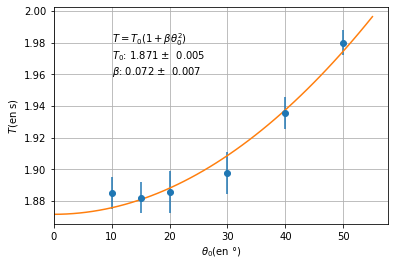

In [10]:
def fit_function(theta, period, beta):
    return period*(1+beta*theta**2)

popt, pcov = curve_fit(fit_function, theta_in_rad, T)

period, beta = popt

# Les points pour la courbe n'ont pas de raison d'être les mêmes 
# que ceux que l'on a mesuré ou calculé
theta_for_plot = np.linspace(0, 55)

plt.errorbar(theta_in_deg, T, yerr=0.2/N, fmt='o')
plt.plot(theta_for_plot, fit_function(theta_for_plot*np.pi/180, period, beta))
plt.xlim(0, None)
plt.grid(True)
plt.xlabel(r'$\theta_0$(en °)')
plt.ylabel(r'$T$(en s)')
plt.text(10, 1.98, r'$T = T_0(1+\beta\theta_0^2)$')
plt.text(10, 1.97, r'$T_0$: {:.3f} $\pm$  {:.3f}'.format(period, np.sqrt(pcov[0,0])))
plt.text(10, 1.96, r'$\beta$: {:.3f} $\pm$  {:.3f}'.format(beta, np.sqrt(pcov[1,1])));